Problem Statement:

4a. Implement a solution for a Constraint Satisfaction Problem using Branch and Bound and Back tracking for n-queens problem.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

# Get board size and initialize empty board
def get_board_size():
    return int(input("Enter the size of the board (n): "))

def initialize_board(n):
    return np.zeros((n, n), dtype=int)

In [3]:
def is_safe(board, row, col):
    """Check if it's safe to place a queen at board[row][col]"""
    n = len(board)
    
    # Check row on left side
    for i in range(col):
        if board[row][i] == 1:
            return False
    
    # Check upper diagonal on left side
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    
    # Check lower diagonal on left side
    for i, j in zip(range(row, n), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    
    return True

In [4]:
def visualize_board(board, title="N-Queens Board", conflict_at=None):
    """
    Visualize the current state of the chessboard
    
    Args:
        board: Current state of the chessboard
        title: Title for the visualization
        conflict_at: Tuple (row, col) showing where conflict occurs for backtracking
    """
    n = len(board)
    plt.figure(figsize=(7, 7))
    
    # Create chessboard pattern
    chessboard = np.zeros((n, n, 3))
    for i in range(n):
        for j in range(n):
            # Alternating squares
            chessboard[i, j] = [1, 0.9, 0.8] if (i + j) % 2 == 0 else [0.8, 0.7, 0.6]
            # Mark queens
            if board[i][j] == 1:
                chessboard[i, j] = [0.8, 0, 0]  # Red for queens
    
    # Highlight conflict position if specified
    if conflict_at:
        row, col = conflict_at
        chessboard[row, col] = [1, 0.5, 0]  # Orange for conflict position
    
    plt.imshow(chessboard)
    plt.grid(True, color='black', linewidth=1.5)
    plt.xticks(np.arange(-.5, n, 1), [])
    plt.yticks(np.arange(-.5, n, 1), [])
    
    # Add queen symbols
    for i in range(n):
        for j in range(n):
            if board[i][j] == 1:
                plt.text(j, i, '♛', fontsize=20, ha='center', va='center')
    
    # Draw lines to show conflicts
    if conflict_at:
        row, col = conflict_at
        
        # Check row conflicts
        for i in range(col):
            if board[row][i] == 1:  # Row conflict
                plt.plot([i, col], [row, row], 'r-', linewidth=2)
                plt.plot([col-0.2], [row], 'r>', markersize=10)  # Arrow
        
        # Check upper diagonal
        for i, j in zip(range(row-1, -1, -1), range(col-1, -1, -1)):
            if board[i][j] == 1:  # Upper diagonal
                plt.plot([j, col], [i, row], 'b-', linewidth=2)
                plt.plot([col-0.2], [row+0.2], 'b>', markersize=10)  # Arrow
        
        # Check lower diagonal
        for i, j in zip(range(row+1, n), range(col-1, -1, -1)):
            if board[i][j] == 1:  # Lower diagonal
                plt.plot([j, col], [i, row], 'g-', linewidth=2)
                plt.plot([col-0.2], [row-0.2], 'g>', markersize=10)  # Arrow
    
    plt.title(title)
    plt.show()

In [5]:
def solve_n_queens(n):
    """Solve the N-Queens problem using backtracking with branch and bound"""
    board = initialize_board(n)
    step_count = [0]  # Using list to modify in nested function
    
    def backtrack(col):
        # Base case: All queens placed
        if col >= n:
            return True
        
        # Try placing queen in each row of this column
        for row in range(n):
            # Try to place queen - but first check if it's safe
            temp_board = board.copy()
            temp_board[row][col] = 1
            
            # If not safe, show why (the conflicts) before moving on
            if not is_safe(board, row, col):
                step_count[0] += 1
                # Show WHY this position isn't safe (show conflicts)
                visualize_board(temp_board, f"Step {step_count[0]}: Cannot place at row {row}, col {col} - CONFLICT!", 
                              conflict_at=(row, col))
                sleep(0.5)
                continue
            
            # If it's safe, place the queen
            board[row][col] = 1
            step_count[0] += 1
            
            # Show placement
            visualize_board(board, f"Step {step_count[0]}: Placed queen at row {row}, col {col}")
            sleep(0.5)
            
            # Recur for next column
            if backtrack(col + 1):
                return True
            
            # Backtrack: Remove queen
            board[row][col] = 0
            step_count[0] += 1
            
            # Show backtracking
            visualize_board(board, f"Step {step_count[0]}: Backtracked from row {row}, col {col}")
            sleep(0.5)
        
        return False
    
    if backtrack(0):
        print("Solution found!")
        visualize_board(board, "Final Solution")
        return board
    else:
        print("No solution exists.")
        return None

Enter the size of the board (n):  4


Solving N-Queens for n = 4...


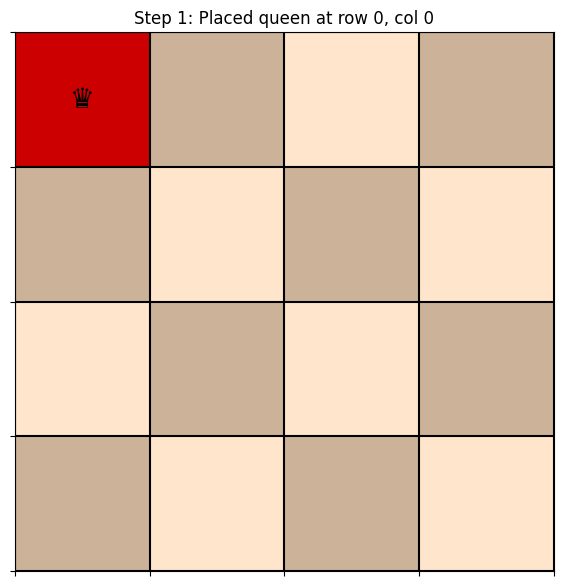

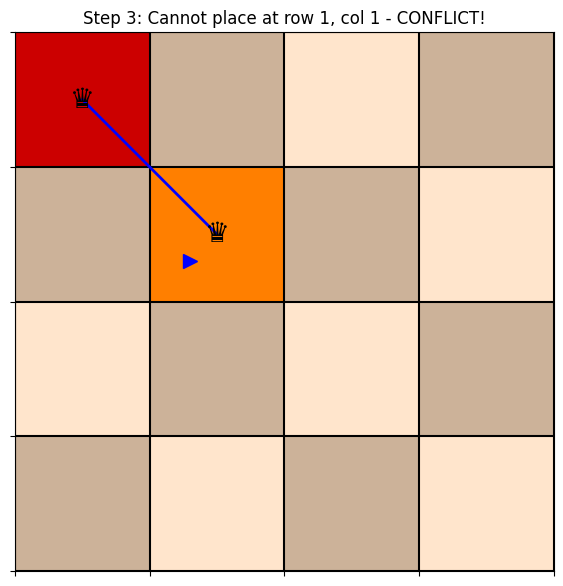

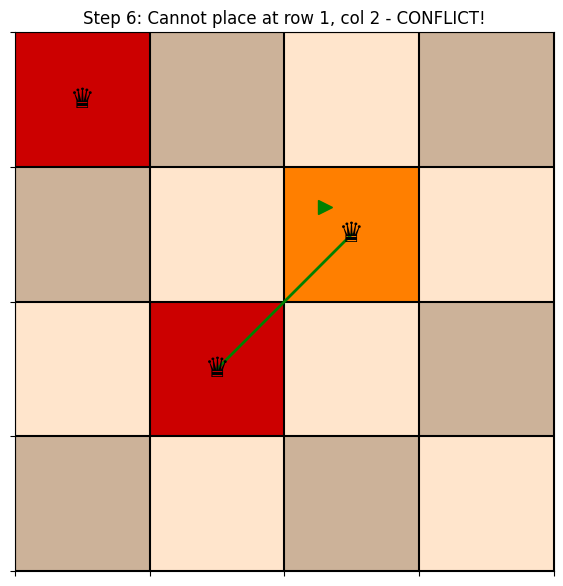

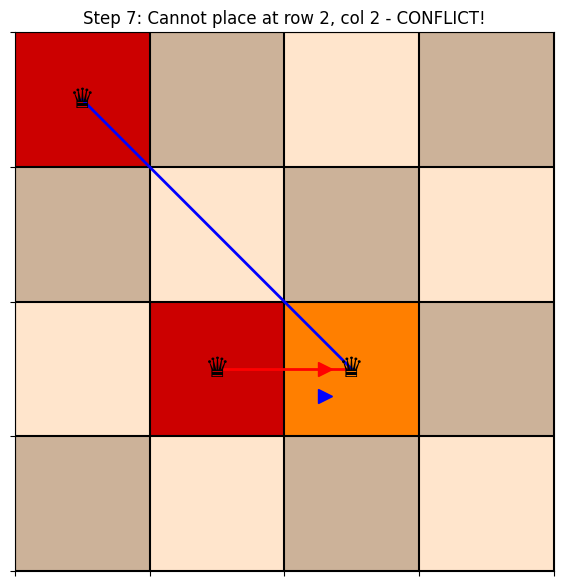

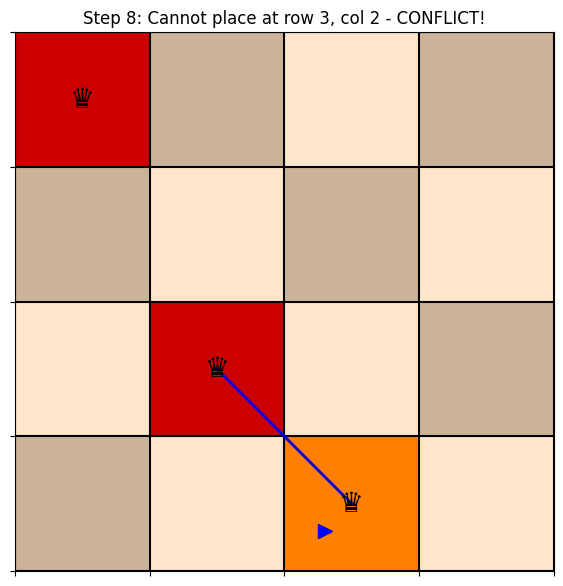

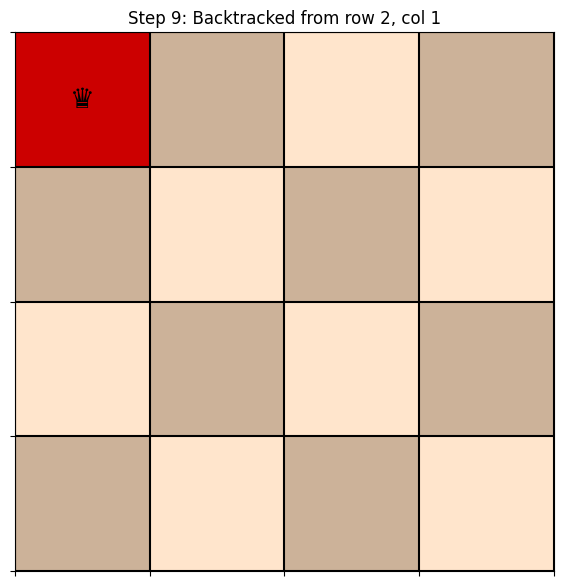

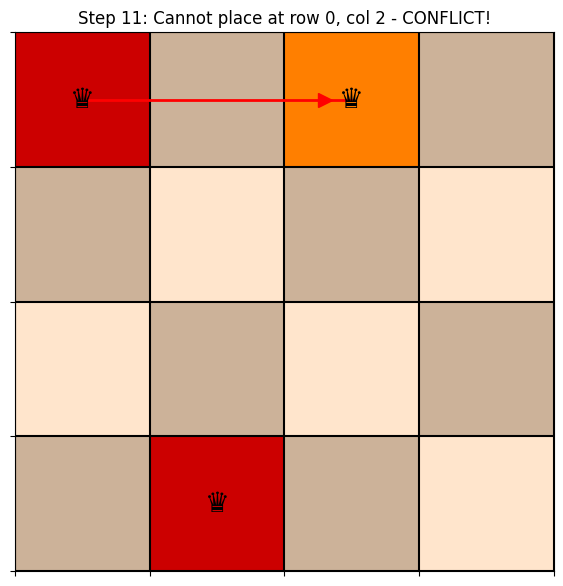

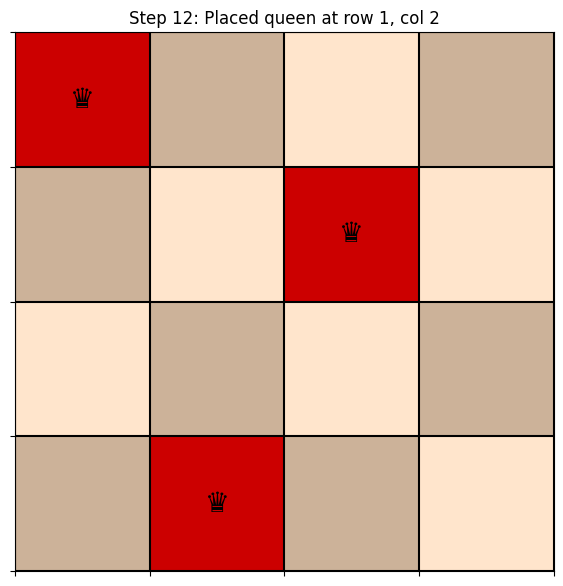

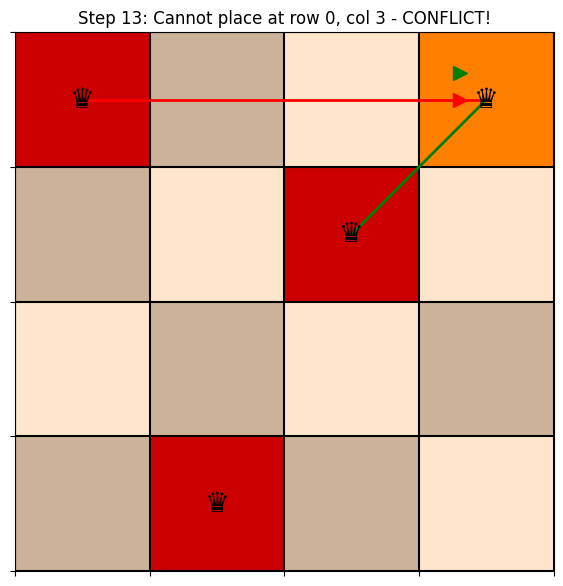

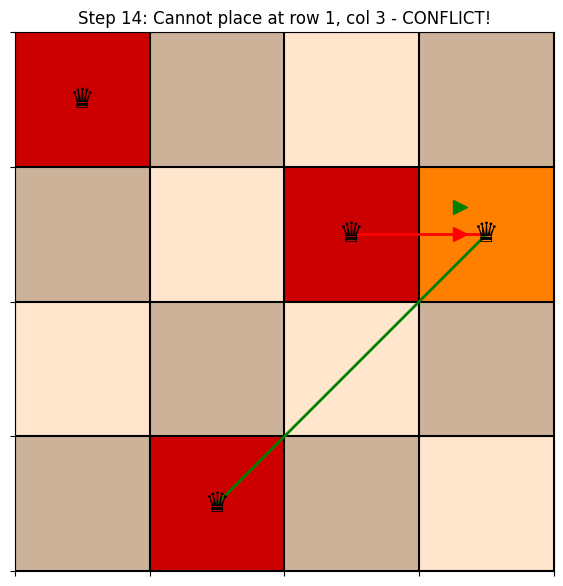

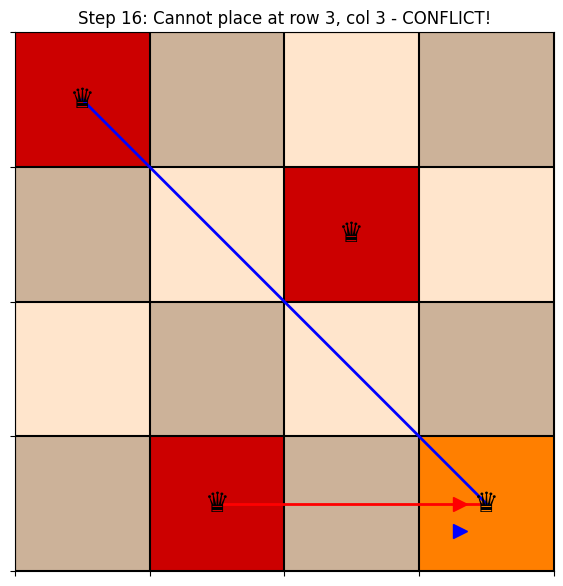

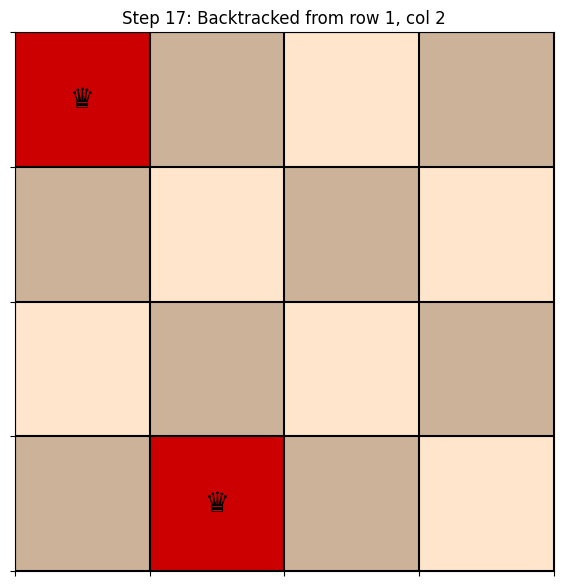

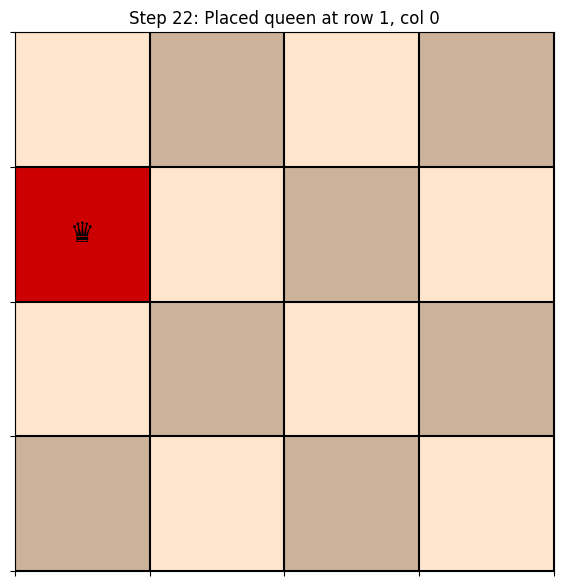

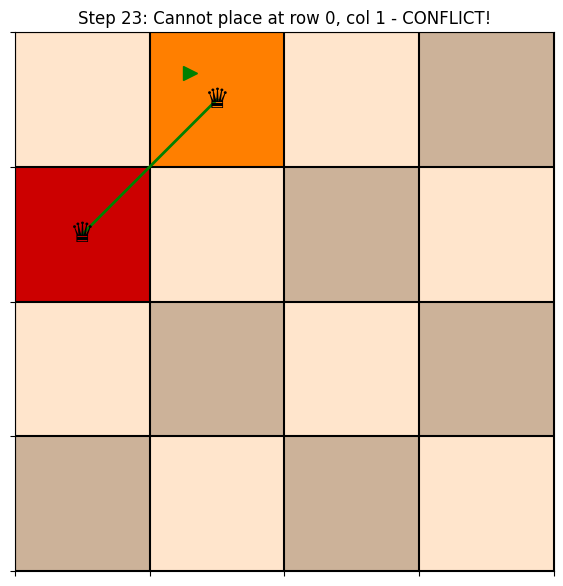

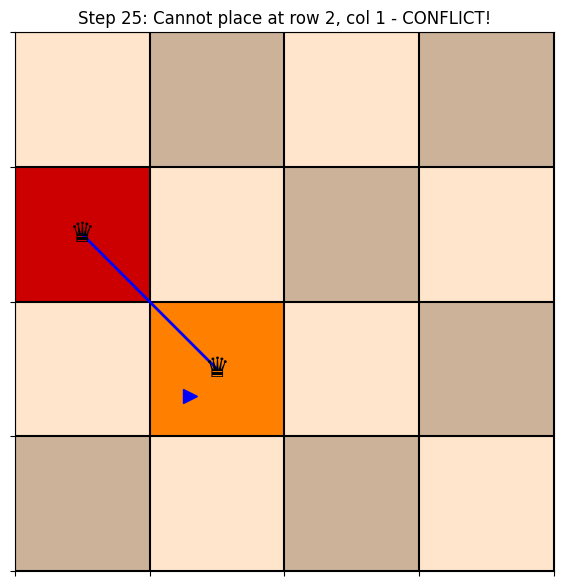

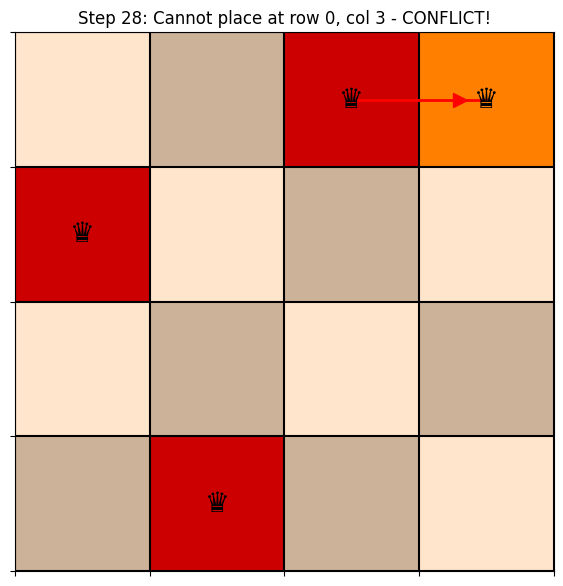

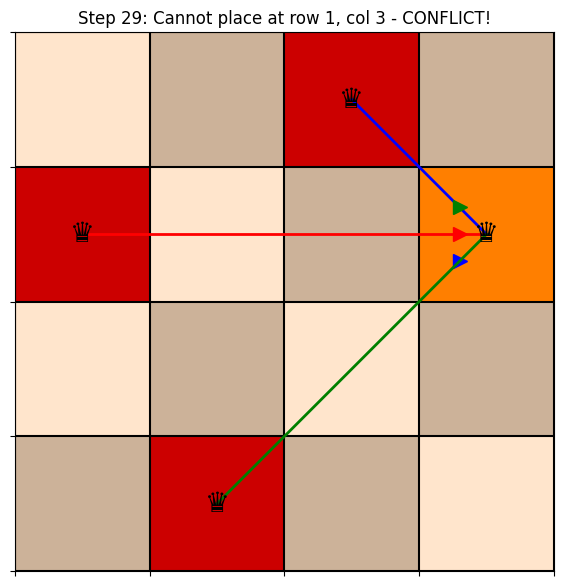

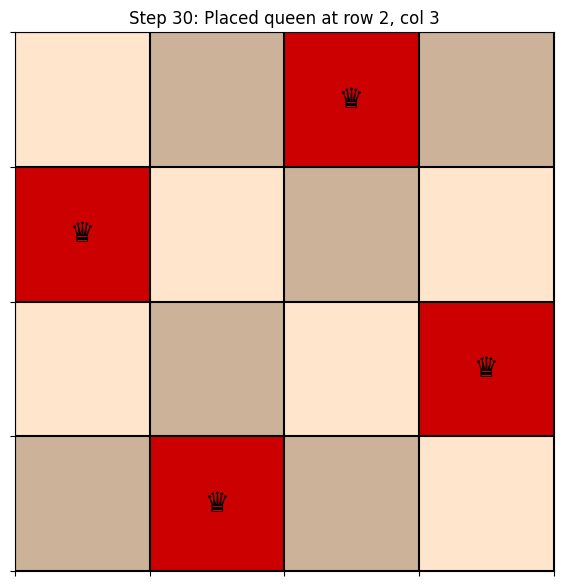

Solution found!


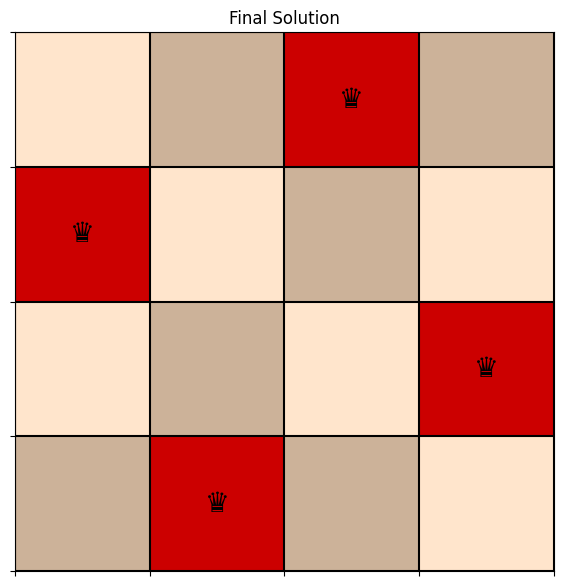

In [6]:
def main():
    n = get_board_size()
    print(f"Solving N-Queens for n = {n}...")
    solve_n_queens(n)

if __name__ == "__main__":
    main()

# N-Queens Problem - Constraint Satisfaction Using Branch and Bound with Backtracking

## 1. Aim

The aim of this program is to implement a solution for the N-Queens Problem using branch and bound techniques combined with backtracking. This solution intends to find valid placements of N queens on an N×N chessboard such that no two queens threaten each other.

## 2. Objectives

1. Implement a backtracking algorithm with branch and bound pruning to solve the N-Queens problem
2. Provide visual representation of the algorithm's execution at each step
3. Demonstrate conflict detection and resolution through backtracking
4. Illustrate the search space exploration process
5. Allow user input to specify the size of the chessboard (N)
6. Optimize the solution by pruning branches that cannot lead to valid solutions

## 3. Expected Output

- A visual representation of the N×N chessboard with queens positioned such that no queen can attack any other
- Step-by-step visualization of:
  - Queen placements
  - Conflict detection (with visual indicators showing why a placement fails)
  - Backtracking operations
- Final solution board with all N queens placed safely
- Information about whether a solution exists for the given board size
- Visual confirmation of the final solution

## 4. Prerequisites

- Understanding of constraint satisfaction problems (CSPs)
- Knowledge of backtracking algorithms
- Familiarity with branch and bound optimization techniques
- Basic understanding of the N-Queens problem
- Python programming skills
- Knowledge of NumPy for array manipulation
- Understanding of Matplotlib for visualization

## 5. Theory

### a. Necessary Definitions and Explanations

**N-Queens Problem**:  
The N-Queens Problem requires placing N chess queens on an N×N chessboard so that no two queens threaten each other. This means no two queens can share the same row, column, or diagonal.

**Constraint Satisfaction Problem (CSP)**:  
A mathematical problem defined as a set of objects whose states must satisfy a number of constraints. The N-Queens problem is a classic example of a CSP where:
- Variables: The N columns of the board
- Domain: The possible row positions (1 to N) for each queen
- Constraints: No two queens can attack each other

**Backtracking**:  
An algorithmic technique that builds candidates for solutions incrementally and abandons a candidate ("backtracks") as soon as it determines the candidate cannot lead to a valid solution.

**Branch and Bound**:  
An optimization technique that systematically enumerates candidate solutions by exploring branches of a search tree and eliminates branches that cannot produce better solutions than the current best solution.

### b. Computation

The computational aspects of the N-Queens solution involve:

1. **State representation**: The board is represented as an N×N matrix where 1 indicates a queen and 0 indicates an empty cell.

2. **Safety checking**: For each potential placement, we check:
   - Row conflicts: No two queens in the same row
   - Column conflicts: No two queens in the same column
   - Diagonal conflicts: No two queens on the same diagonal

3. **Time complexity**: O(N!), as in the worst case, we might need to explore all possible placements.

4. **Space complexity**: O(N²) for the board representation, and O(N) for the recursion stack.

5. **Optimization**: The implementation uses branch and bound by:
   - Only considering one queen per column, which reduces the search space
   - Only checking conflicts to the left of the current position (since we place queens from left to right)
   - Pruning branches as soon as a conflict is detected

### c. Algorithms

**N-Queens Backtracking Algorithm with Branch and Bound**:

```
function solveNQueens(n):
    Initialize empty board of size n×n
    
    function backtrack(col):
        if col >= n:
            return true (solution found)
        
        for row from 0 to n-1:
            if isSafe(board, row, col):
                Place queen at board[row][col]
                Visualize placement
                
                if backtrack(col + 1):
                    return true
                
                Remove queen from board[row][col] (backtrack)
                Visualize backtracking
        
        return false (no solution for this path)
    
    function isSafe(board, row, col):
        # Check row on left side
        for i from 0 to col-1:
            if board[row][i] == 1:
                return false
        
        # Check upper diagonal on left side
        for i,j in zip(range(row, -1, -1), range(col, -1, -1)):
            if board[i][j] == 1:
                return false
        
        # Check lower diagonal on left side
        for i,j in zip(range(row, n), range(col, -1, -1)):
            if board[i][j] == 1:
                return false
        
        return true
    
    return backtrack(0)
```

**Visualization Algorithm**:

```
function visualizeBoard(board, title, conflict_at=None):
    Create an empty visualization
    
    Draw chessboard pattern
    
    For each position with a queen:
        Draw queen symbol
    
    If conflict_at is provided:
        Highlight the conflict position
        Draw lines showing the conflict paths
        
    Display visualization with title
```

### d. Example

Let's trace through a small example with a 4×4 board (n=4):

1. Start with an empty board and try placing queens column by column.
2. Place the first queen at (0,0) - row 0, column 0.
3. Try to place the second queen at (0,1) - Conflict with the first queen (same row).
4. Try to place the second queen at (1,1) - Conflict with the first queen (diagonal).
5. Try to place the second queen at (2,1) - No conflict, place queen.
6. Try to place the third queen at (0,2) - Conflict with the first queen (row).
7. Try to place the third queen at (1,2) - Conflict with the second queen (row).
8. Try to place the third queen at (2,2) - Conflict with the second queen (row).
9. Try to place the third queen at (3,2) - Conflict with previous queens (diagonal).
10. Backtrack to the second queen and move it to position (3,1).
11. Continue this process...

Eventually, we find a solution:
- Queen 1: (1,0)
- Queen 2: (3,1)
- Queen 3: (0,2)
- Queen 4: (2,3)

This gives us a valid N-Queens solution for n=4.

### e. Applications

The N-Queens problem and its solution techniques have several applications:

1. **Computer Science Education**: Used to teach backtracking and constraint satisfaction algorithms.

2. **Artificial Intelligence**: Model for testing and benchmarking search and constraint satisfaction algorithms.

3. **Parallel Computing**: Used as a benchmark problem for parallel algorithm design.

4. **VLSI Design**: Circuit layout and component placement to minimize interference.

5. **Resource Allocation**: Scheduling problems where resources cannot conflict.

6. **Network Design**: Placing network nodes to minimize interference or maximize coverage.

7. **Facility Location Problems**: Placing facilities to satisfy multiple constraints.

8. **Game Development**: AI pathfinding and decision-making algorithms.

9. **Robotics**: Motion planning and coordination of multiple robots to avoid collisions.

10. **Operations Research**: Used as a model for various optimization problems.

## 6. Conclusion

The N-Queens problem is a classic constraint satisfaction problem that demonstrates the power and limitations of backtracking algorithms with branch and bound optimization. The implementation provided in the code effectively:

1. Uses backtracking to systematically explore the solution space
2. Implements branch and bound techniques by pruning unpromising paths early
3. Provides visual feedback to help understand the algorithm's execution
4. Allows for interactive exploration of different board sizes

While the time complexity of this approach is exponential (O(N!)), the branch and bound optimizations significantly reduce the actual number of explored states compared to a naive approach. The visualizations help to understand both the problem and the solution process.

For large values of N, more sophisticated approaches might be needed, such as local search algorithms, genetic algorithms, or specialized heuristics. However, the backtracking approach with branch and bound remains an elegant and educational solution for moderate board sizes.

This implementation serves as both a practical solution to the N-Queens problem and an educational tool for understanding backtracking, constraint satisfaction, and branch and bound techniques in algorithmic problem-solving.